 # Домашняя работа №1

# Задача №2

Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:  P0= 5 MPa,  t0= 450 градусов Цельсия,  pk= 5, 10, 15, 20, 50 kPa. Принять давление за последней ступенью паровой турбины  p2=pk. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе. 

In [1]:
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [3]:
# Начальные параметры:
p0 = 5
t0 = to_kelvin(450)
pk =[5, 10, 15, 20, 50]

In [10]:
def eff(p_0,t_0,p_k):
    p_0 = p_0 * MPa
    p_k = p_k * kPa
    point_0 = gas(P=p_0 * unit, T=t_0)
    point_condenser_inlet = gas(P=p_k * unit, s=point_0.s)
    point_pump_outlet = gas(P=p_k * unit, x=0)
    useful_energy = point_0.h - point_condenser_inlet.h
    full_energy = point_0.h - point_pump_outlet.h
    efficiency = round(useful_energy/full_energy*100,3)
    return efficiency

In [11]:
efficiency = []
for pk_value in pk:
        efficiency.append(eff(p0,t0,pk_value))
efficiency

[38.93, 37.014, 35.807, 34.907, 31.766]

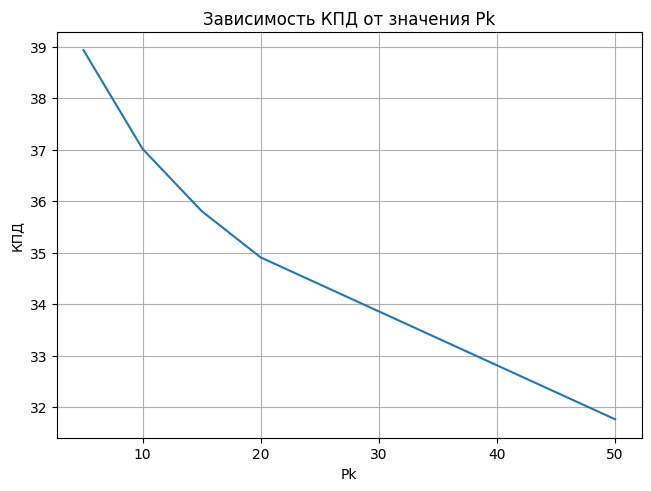

In [12]:
x = pk

plt.figure(layout = 'constrained')
plt.plot(x, efficiency)  
plt.xlabel('Pk')
plt.ylabel('КПД')
plt.title("Зависимость КПД от значения Pk")
plt.grid()

In [19]:
for value in pk:
    print("Значение КПД в точке c данным давление",value,":",efficiency, "%" )

Значение КПД в точке c данным давление 5 : [38.93, 37.014, 35.807, 34.907, 31.766] %
Значение КПД в точке c данным давление 10 : [38.93, 37.014, 35.807, 34.907, 31.766] %
Значение КПД в точке c данным давление 15 : [38.93, 37.014, 35.807, 34.907, 31.766] %
Значение КПД в точке c данным давление 20 : [38.93, 37.014, 35.807, 34.907, 31.766] %
Значение КПД в точке c данным давление 50 : [38.93, 37.014, 35.807, 34.907, 31.766] %
